In [1]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [2]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "graves"
dataset = "fuzzyx"
methods = ["NBC_TI", "NBC", "sklearn_kmeans"]

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([3, 1, 5, 4, 2])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC clusterization

In [5]:
%%time
model = NBC()
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 0 ns
Wall time: 998 µs


## NBC-TI clusterization

In [6]:
%%time
model = NBC_TI()
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)
results.keys()

CPU times: total: 0 ns
Wall time: 1 ms


dict_keys(['sklearn_kmeans', 'NBC', 'NBC_TI'])

## Comparison

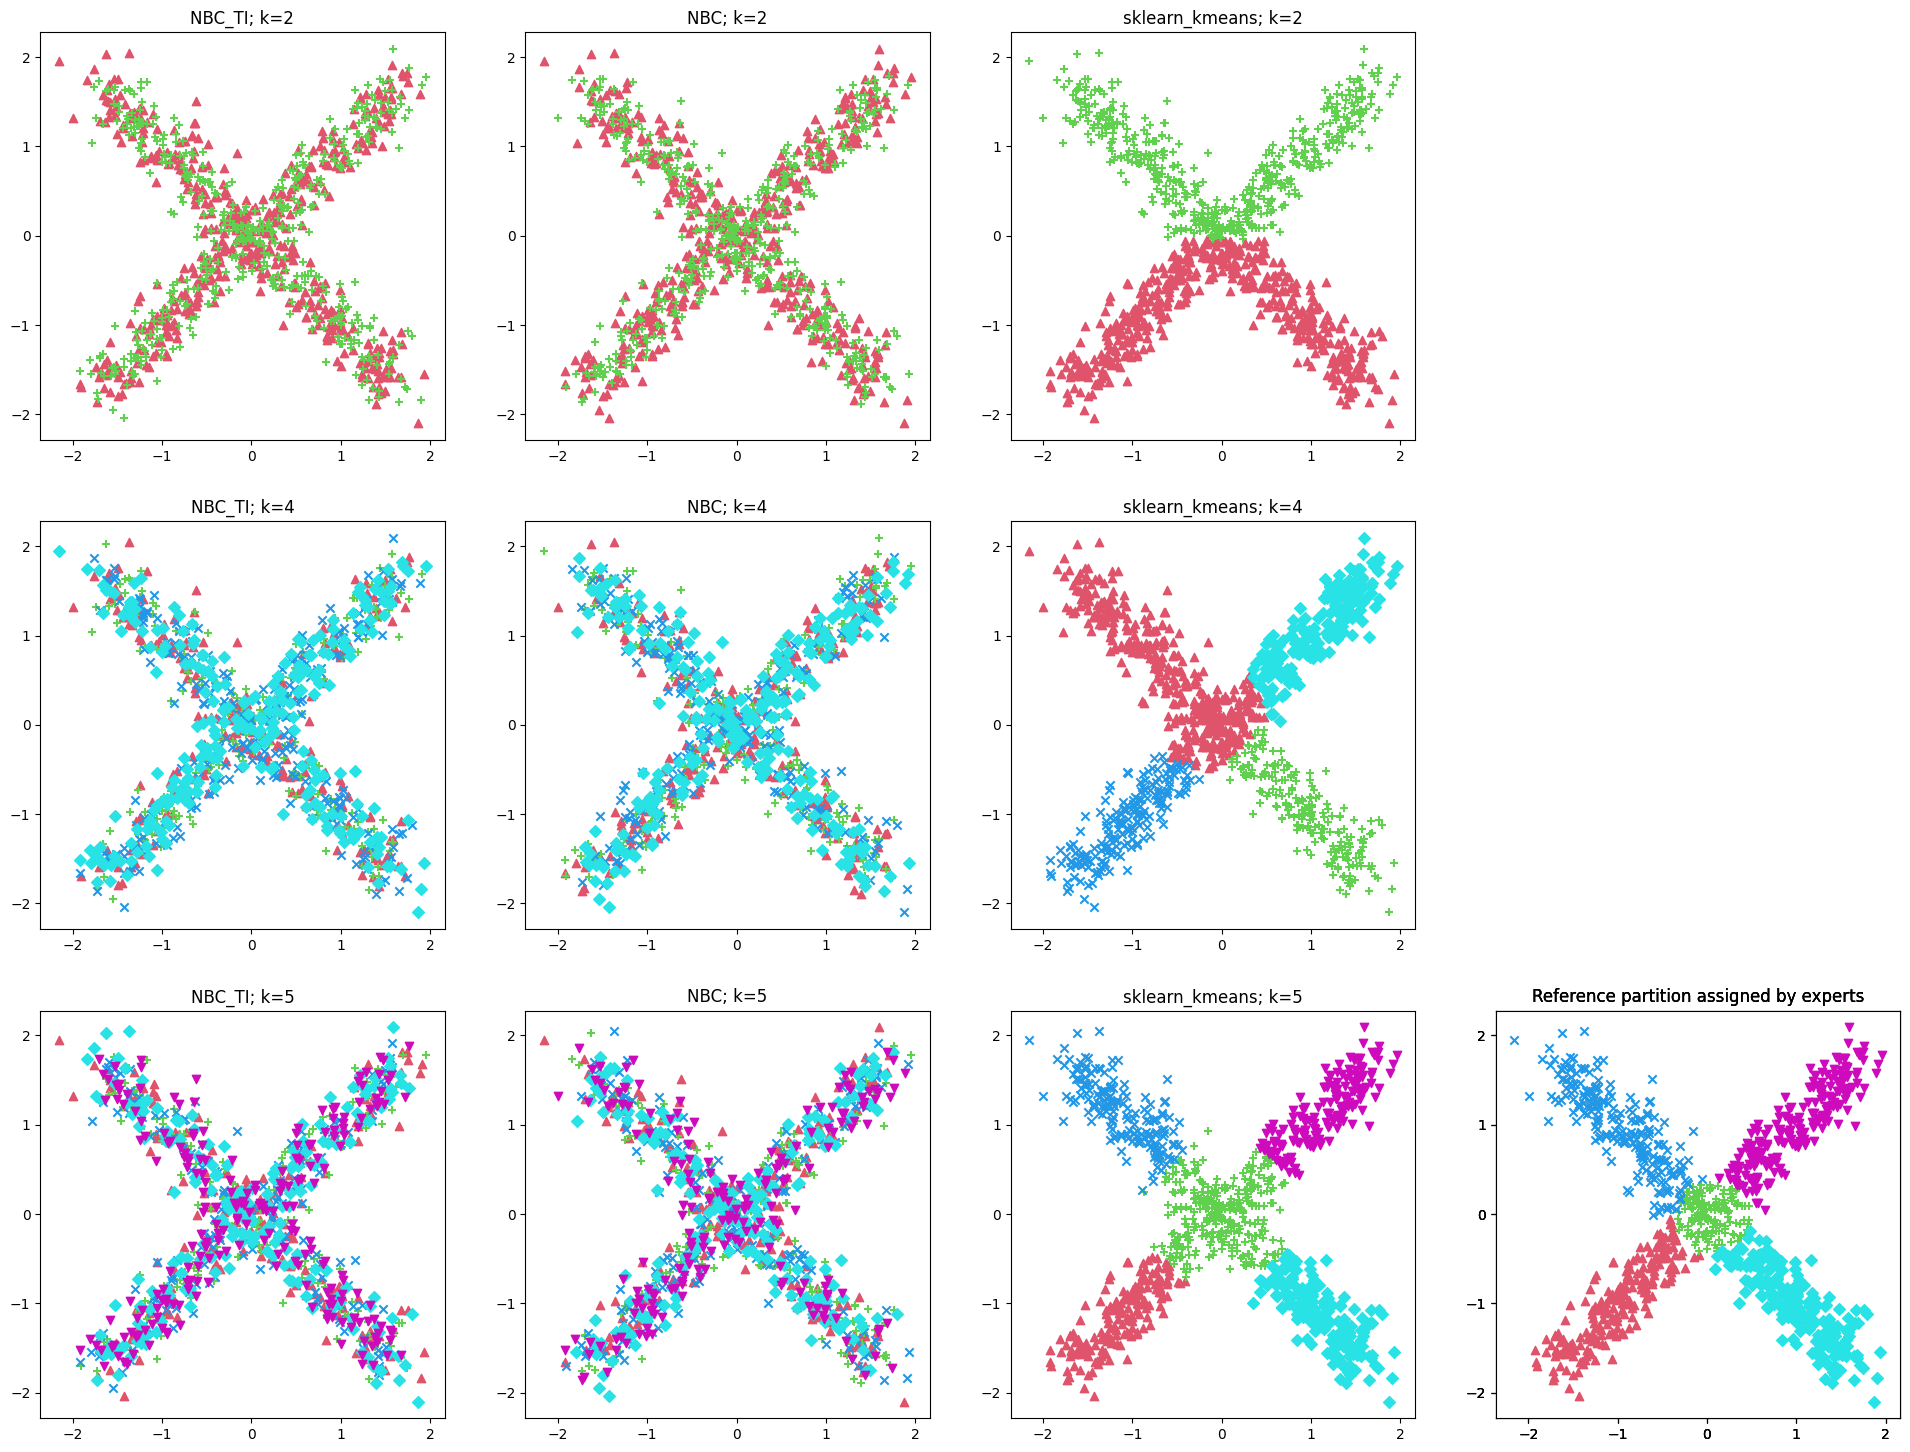

In [7]:
plot_results(benchmark.data, methods, results, reference)

In [8]:
confusion_matricies_table(methods, results, reference)

╒════════════════════╤════════════════════╤═════════════════════════╕
│ NBC_TI k=5:        │ NBC k=5:           │ sklearn_kmeans k=5:     │
│ [[30 39 44 43 56]  │ [[34 35 51 41 51]  │ [[166  46   0   0   0]  │
│  [33 36 29 35 28]  │  [39 28 29 37 28]  │  [  0 161   0   0   0]  │
│  [39 50 40 41 47]  │  [43 45 45 41 43]  │  [  0  48 169   0   0]  │
│  [39 40 34 38 49]  │  [44 48 40 42 26]  │  [  0  32   0 168   0]  │
│  [35 44 34 47 50]] │  [43 41 40 41 45]] │  [  0  45   0   0 165]] │
╘════════════════════╧════════════════════╧═════════════════════════╛


In [9]:
measures(methods, results, reference)

╒═════════════════════════════╤═════════════════════════════╤══════════════════════════╕
│ NBC_TI k=5:                 │ NBC k=5:                    │ sklearn_kmeans k=5:      │
│ ar: -0.00126451053610409    │ ar: 0.00024301418673250248  │ ar: 0.597770039386086    │
│ r: 0.6781621621621621       │ r: 0.6797457457457456       │ r: 0.8659339339339339    │
│ fm: 0.2001850890710959      │ fm: 0.20046722560457136     │ fm: 0.6832564057685244   │
│ afm: -0.0012645106066364103 │ afm: 0.00024301782460386403 │ afm: 0.5986004661922729  │
│ mi: 0.005178074245479225    │ mi: 0.008863435964488131    │ mi: 1.1389989122841737   │
│ nmi: 0.0032275430441989026  │ nmi: 0.005516793970643798   │ nmi: 0.7195965428863917  │
│ ami: -0.0017991403493413604 │ ami: 0.0005091445039121453  │ ami: 0.7181625027155977  │
│ npa: 0.028749999999999998   │ npa: 0.030000000000000027   │ npa: 0.7862499999999999  │
│ psi: 0.02242177716620978    │ psi: 0.02682955130974613    │ psi: 0.6777069084712141  │
│ spsi: 0.01557872960